In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.regression import RegressionExperiment
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataset Review

In [2]:
df = pd.read_csv('Volve P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

In [3]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [4]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [5]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


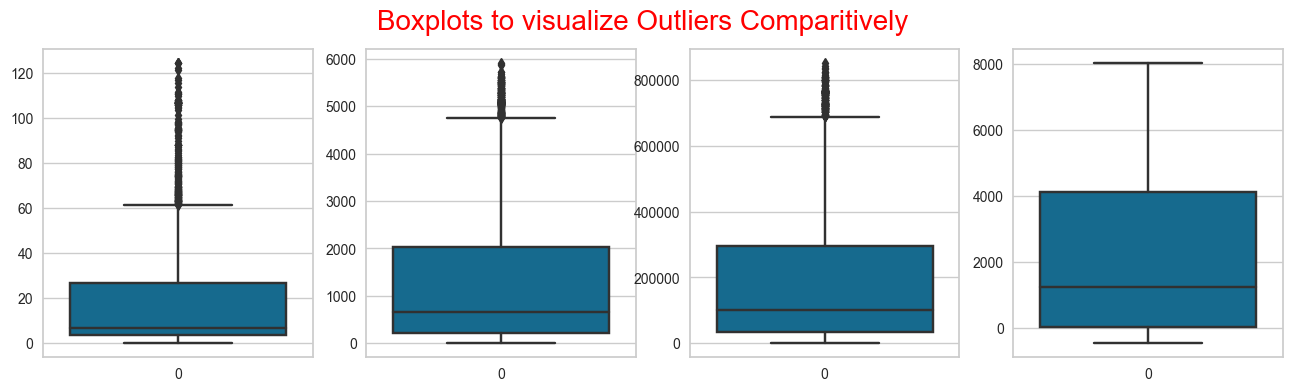

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.boxplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.boxplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.boxplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.boxplot(df['BORE_WAT_VOL']);

plt.suptitle('Boxplots to visualize Outliers Comparitively', size=20, color='red');

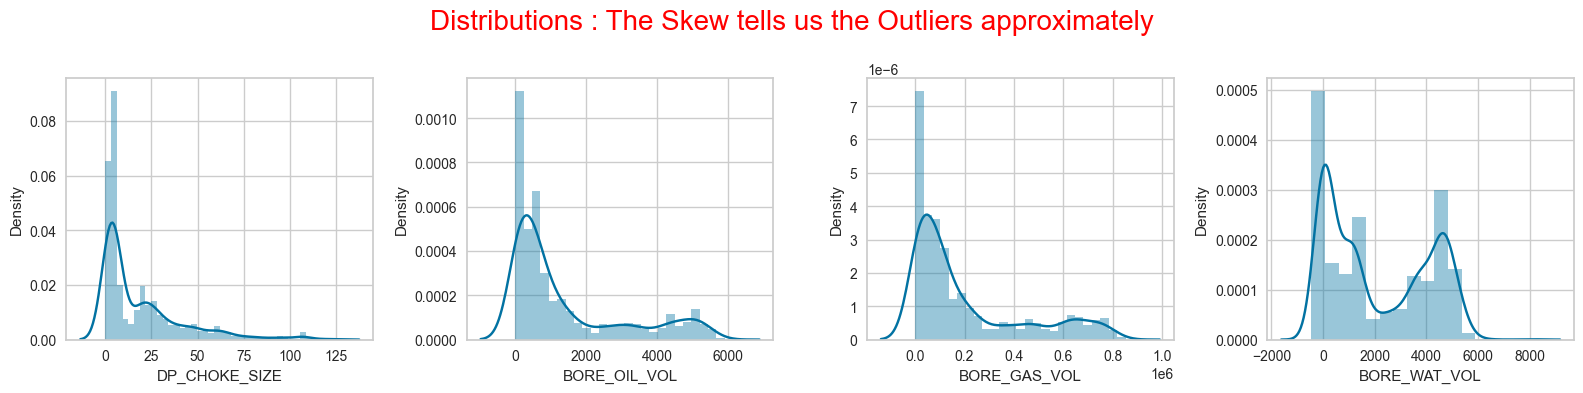

In [7]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.distplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.distplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.distplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.distplot(df['BORE_WAT_VOL']);



plt.suptitle('Distributions : The Skew tells us the Outliers approximately', size=20, color='red');

plt.tight_layout()

#  Analyze data before 2010

In [8]:
#Adding Date Column

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

In [9]:
df = pd.read_csv("Volve P-12_DatesCorrected.csv")
_= df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            3291 non-null   datetime64[ns]
 1   onstreaminject_HRS              3291 non-null   float64       
 2   BORE_WI_VOL                     3291 non-null   int64         
 3   ON_STREAM_HRS                   3291 non-null   float64       
 4   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64       
 5   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64       
 6   AVG_DP_TUBING                   3291 non-null   float64       
 7   AVG_ANNULUS_PRESS               3291 non-null   float64       
 8   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64       
 9   AVG_WHP_P                       3291 non-null   float64       
 10  AVG_WHT_P                       3291 non-null   float64       
 11  DP_C

In [11]:
df[df['AVG_DOWNHOLE_TEMPERATURE']==0]['AVG_DOWNHOLE_TEMPERATURE'].count()

2318

In [12]:
df.head()

,Date,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Timestamp max 

df_before_2010 = df[(df['Date']<='2011-01-01') &(df['AVG_DOWNHOLE_TEMPERATURE']!=0)]
df_before_2010['Date'].max()

Timestamp('2010-01-13 00:00:00')

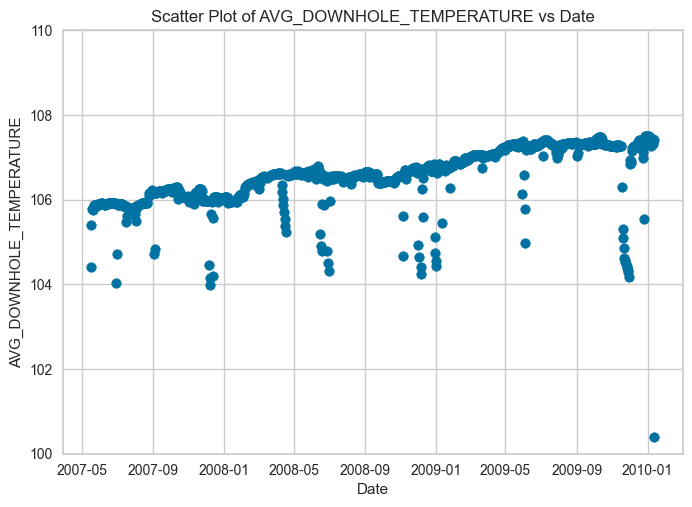

In [14]:
#Scatter Plot of AVG_DOWNHOLE_TEMPERATURE vs Date

plt.scatter(df_before_2010['Date'], df_before_2010['AVG_DOWNHOLE_TEMPERATURE'])
plt.xlabel('Date')
plt.ylabel('AVG_DOWNHOLE_TEMPERATURE')
plt.title('Scatter Plot of AVG_DOWNHOLE_TEMPERATURE vs Date')
plt.ylim(100, 110)
plt.show()

In [15]:
df_before_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 128 to 1100
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            973 non-null    datetime64[ns]
 1   onstreaminject_HRS              973 non-null    float64       
 2   BORE_WI_VOL                     973 non-null    int64         
 3   ON_STREAM_HRS                   973 non-null    float64       
 4   AVG_DOWNHOLE_PRESSURE           973 non-null    float64       
 5   AVG_DOWNHOLE_TEMPERATURE        973 non-null    float64       
 6   AVG_DP_TUBING                   973 non-null    float64       
 7   AVG_ANNULUS_PRESS               973 non-null    float64       
 8   AVG_CHOKE_SIZE_P in percentage  973 non-null    float64       
 9   AVG_WHP_P                       973 non-null    float64       
 10  AVG_WHT_P                       973 non-null    float64       
 11  DP_

In [16]:
#Reression Experiment

regexp = RegressionExperiment()
regexp.setup(df_before_2010, target='AVG_DOWNHOLE_TEMPERATURE')

,Description,Value
0,Session id,3014
1,Target,AVG_DOWNHOLE_TEMPERATURE
2,Target type,Regression
3,Original data shape,"(973, 15)"
4,Transformed data shape,"(973, 17)"
5,Transformed train set shape,"(681, 17)"
6,Transformed test set shape,"(292, 17)"
7,Numeric features,13
8,Date features,1
9,Preprocess,True


In [17]:
#Compare models

best = regexp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.5189,14.2049,2.2618,0.4332,0.0285,0.0077,0.0300
dummy,Dummy Regressor,0.8803,15.1358,2.5619,-0.2835,0.0313,0.0111,0.0240
omp,Orthogonal Matching Pursuit,0.8497,15.2411,2.5658,-0.3171,0.0313,0.0108,0.0230
et,Extra Trees Regressor,0.4066,10.9086,2.0419,-0.4788,0.0260,0.0062,0.1450
ada,AdaBoost Regressor,0.6667,13.8405,2.3431,-0.7937,0.0300,0.0089,0.0450
lasso,Lasso Regression,1.0628,14.2230,2.6506,-1.5105,0.0321,0.0127,0.0160
llar,Lasso Least Angle Regression,1.0630,14.2232,2.6508,-1.5118,0.0321,0.0127,0.0140
br,Bayesian Ridge,1.1060,14.5301,2.6923,-1.6365,0.0325,0.0131,0.0150
en,Elastic Net,1.1103,14.2051,2.6746,-1.7243,0.0323,0.0131,0.0230
lightgbm,Light Gradient Boosting Machine,0.7615,13.3280,2.5958,-2.1131,0.0317,0.0098,0.1140


# Evaluate Model after 2010

In [18]:
regexp.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
df_after_2010 = df[df['Date']>df_before_2010['Date'].max()].drop(columns=['AVG_DOWNHOLE_TEMPERATURE'])

df_after_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1101 to 3290
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            2190 non-null   datetime64[ns]
 1   onstreaminject_HRS              2190 non-null   float64       
 2   BORE_WI_VOL                     2190 non-null   int64         
 3   ON_STREAM_HRS                   2190 non-null   float64       
 4   AVG_DOWNHOLE_PRESSURE           2190 non-null   float64       
 5   AVG_DP_TUBING                   2190 non-null   float64       
 6   AVG_ANNULUS_PRESS               2190 non-null   float64       
 7   AVG_CHOKE_SIZE_P in percentage  2190 non-null   float64       
 8   AVG_WHP_P                       2190 non-null   float64       
 9   AVG_WHT_P                       2190 non-null   float64       
 10  DP_CHOKE_SIZE                   2190 non-null   float64       
 11  B

In [20]:
#Timestamp after 2010
df_after_2010['Date'].min()

Timestamp('2010-01-14 00:00:00')

# Interpolation Model

In [21]:
df.columns

Index(['Date', 'onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

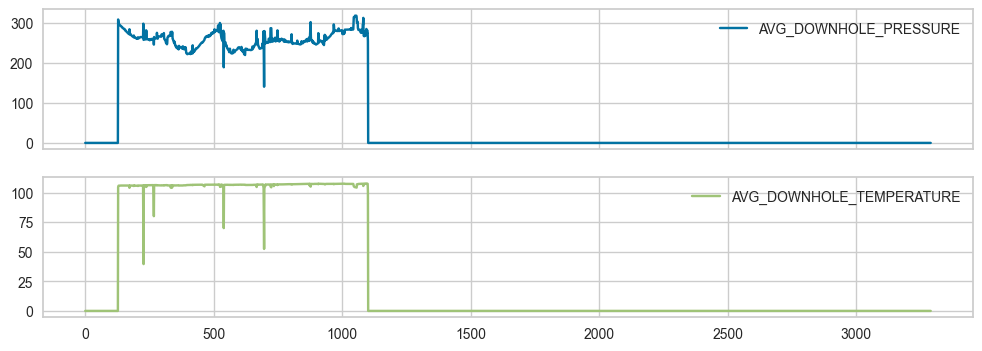

In [22]:
df_tooManyZeros = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']]
df_tooManyZeros.plot(figsize=(12,4), subplots=True, grid=True)

<AxesSubplot: >

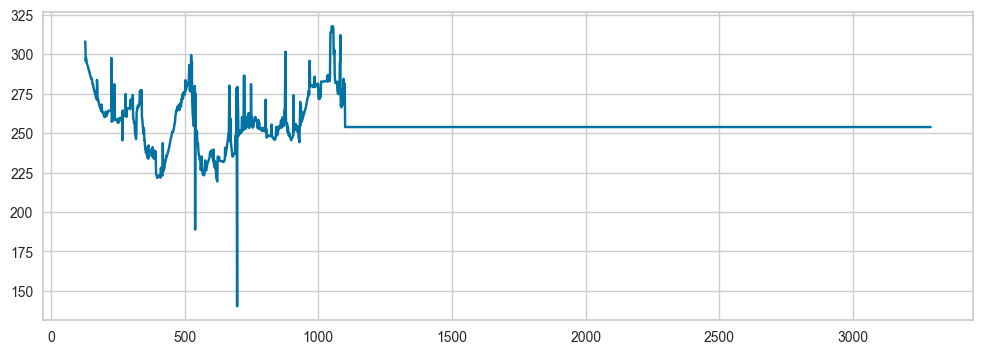

In [23]:
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate().plot(figsize=(12,4))

<AxesSubplot: >

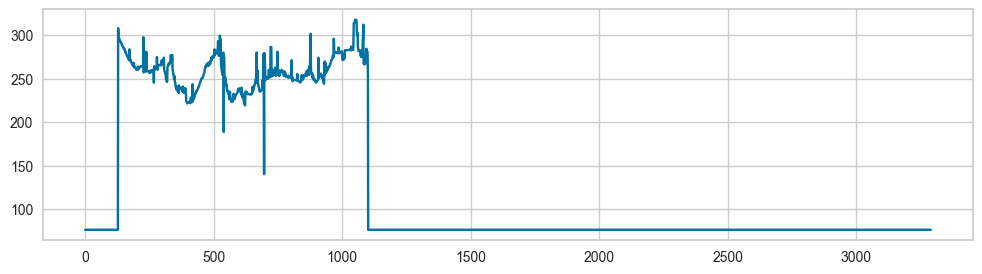

In [24]:
avg_temp = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].mean()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,avg_temp).plot(figsize=(12,3))

In [25]:
#Using interpolation

df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'].replace(0,np.nan).interpolate()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate()

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

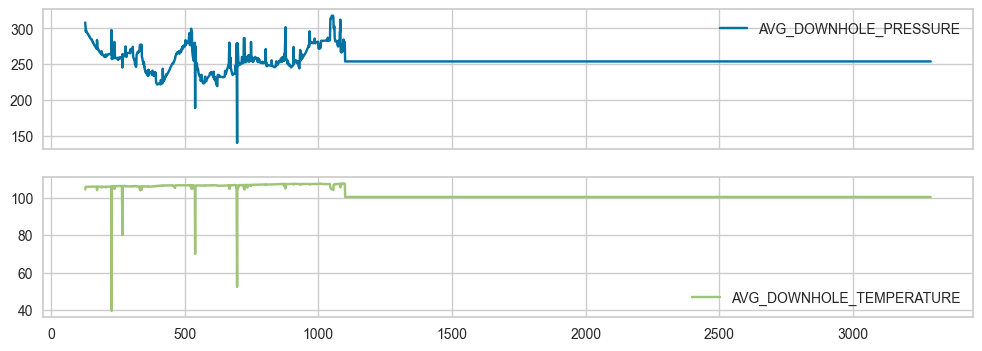

In [26]:
df_tooManyZeros.plot(figsize=(12,4), subplots=True)

In [27]:
#Apply correction to original dataset 
df['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE']
df['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE']

# Data Scaling

In [28]:
df.columns

Index(['Date', 'onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [29]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [30]:
output_target = 'AVG_DOWNHOLE_TEMPERATURE'

In [31]:
df_train = df.iloc[:3000,:].fillna(0)
df_test = df.iloc[3000:,:].fillna(0)

In [32]:
X_train = df_train.drop(output_target, axis=1) ; y_train = df_train[output_target]
X_test = df_test.drop(output_target , axis=1) ; y_test = df_test[output_target]

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [37]:
X_train.values.min(), X_train.values.max()

(-458.0, 8020.0)

# Prediction Model

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor(n_estimators=200)

In [40]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [41]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

<AxesSubplot: >

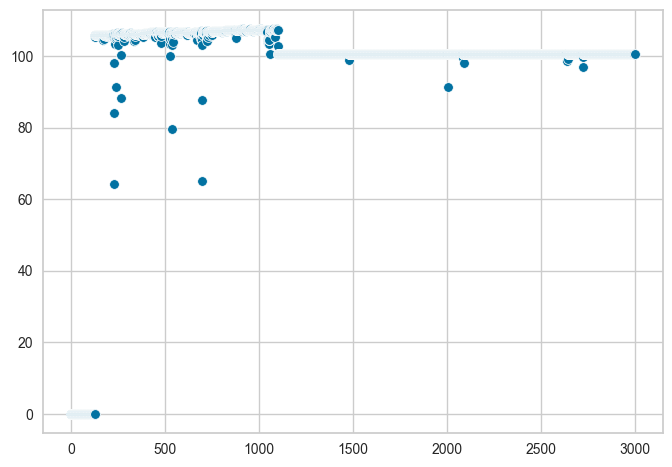

In [42]:
sns.scatterplot(yp_train)

<AxesSubplot: >

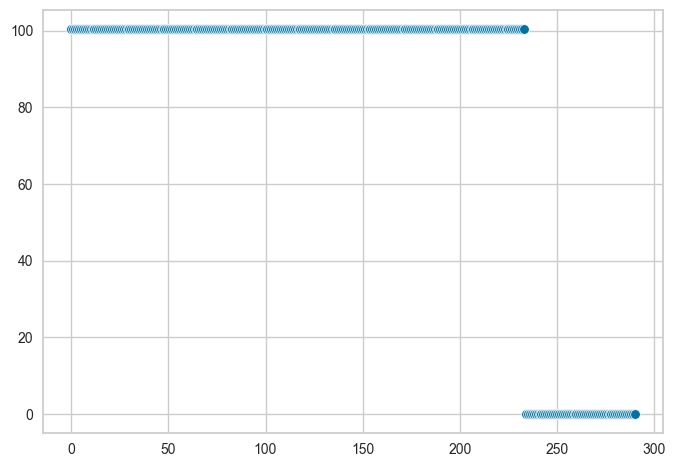

In [43]:
sns.scatterplot(yp_test)

(150.0, 3290.0)

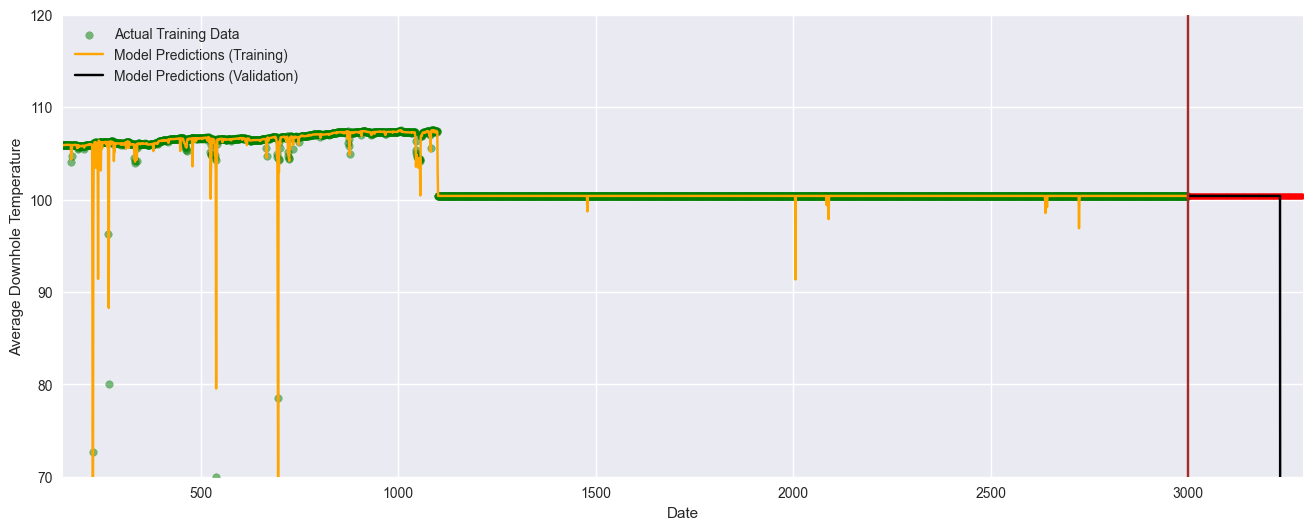

In [44]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='green', alpha=0.5, s=30, label='Actual Training Data')
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)', color='orange')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')


plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])

In [45]:
predictions = regexp.predict_model(best, data=df_after_2010)
predictions['prediction_label'].describe()

count    2190.000000
mean      107.366623
std         1.006843
min       104.939326
25%       106.948826
50%       107.509522
75%       108.177261
max       108.780806
Name: prediction_label, dtype: float64

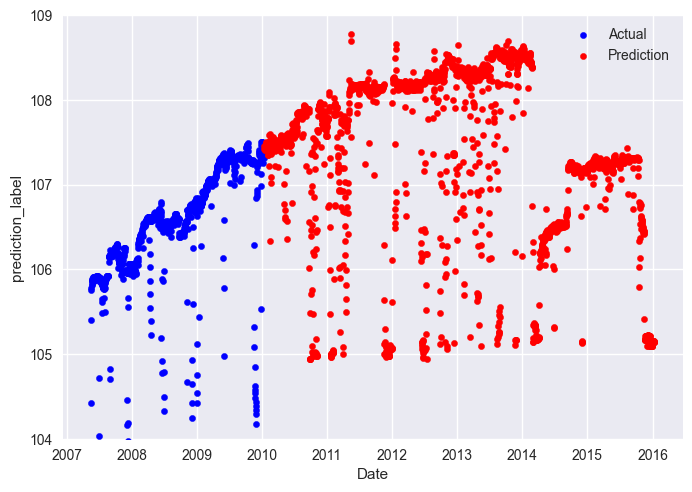

In [46]:
fig, ax = plt.subplots()

df_before_2010.plot(x='Date', y='AVG_DOWNHOLE_TEMPERATURE', kind='scatter', color='blue', ax=ax, label='Actual')
predictions.plot(x='Date', y='prediction_label', kind='scatter', color='red', ax=ax, label='Prediction')
plt.ylim(104, 109)
plt.legend()
plt.show()